### Dataset Choice: UCI Wholesale Customers Dataset
#### The UCI Wholesale customers dataset is chosen for its richness in offering insights into customer purchasing behavior across different product categories. 
#### This dataset includes annual spending in monetary units on various product categories such as Fresh, Milk, Grocery, Frozen, Detergents_Paper, and Delicatessen by different clients of a wholesale distributor.

### Problem Statement:

### As an executive at the wholesale distribution company, the challenge is to optimize our inventory and tailor our marketing strategies to better meet the needs of our diverse clientele. The primary issue is that our customer base is varied, and a one-size-fits-all approach to inventory management and marketing is inefficient and could lead to missed opportunities for targeted sales initiatives and improved customer satisfaction.

### Algorithmic Solution: EM/GMM
#### The Expectation-Maximization (EM) algorithm with Gaussian Mixture Models (GMM) offers an advanced solution for identifying latent customer segments based on their annual spending across different product categories. The soft clustering approach of GMM is particularly suited for this dataset because customer purchasing behavior is likely to exhibit overlapping characteristics between segments, with varying degrees of association to each segment.

In [26]:
# importing necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent line wrapping

In [27]:
# reading the dataset
data = pd.read_csv("Wholesale customers data.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [30]:
# checking if there are any missing values associated with any of the attributes
is_null = data.isnull().sum()
is_null

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

##### There are no null values associated with any of the attributes

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


##### all all attributes are numerical and there are 440 records of data present, with 8 columns

In [34]:
# Let's check the mean, standard deviations of these attiributes present in data
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [35]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Applying standard scalar to normalize the data

In [39]:
# Let's normalize the data such that all attributes contribute equally to the model
from sklearn.preprocessing import MinMaxScaler, StandardScaler

columns_to_select = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
features = data[columns_to_select]

# Standard Scaling
standard_scaler = StandardScaler()
features_standard_scaled = standard_scaler.fit_transform(features)
data_standard_scaled = pd.DataFrame(features_standard_scaled, columns=features.columns)


In [40]:
data_standard_scaled.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [41]:
# one-hot encoding the categorical column
categorical_features = data[['Channel', 'Region']]
categorical_features_encoded = pd.get_dummies(categorical_features, columns=['Channel', 'Region'])

In [43]:
# Ensure the indices align between the two DataFrames
categorical_features_encoded.index = data_standard_scaled.index

# Concatenate along the columns
final_df_scaled = pd.concat([data_standard_scaled, categorical_features_encoded], axis=1)

In [44]:
# final preprocessed data
final_df_scaled.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,False,True,False,False,True
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,False,True,False,False,True
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,False,True,False,False,True
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,True,False,False,False,True
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,False,True,False,False,True


### Exploratory Data Analysis (EDA):

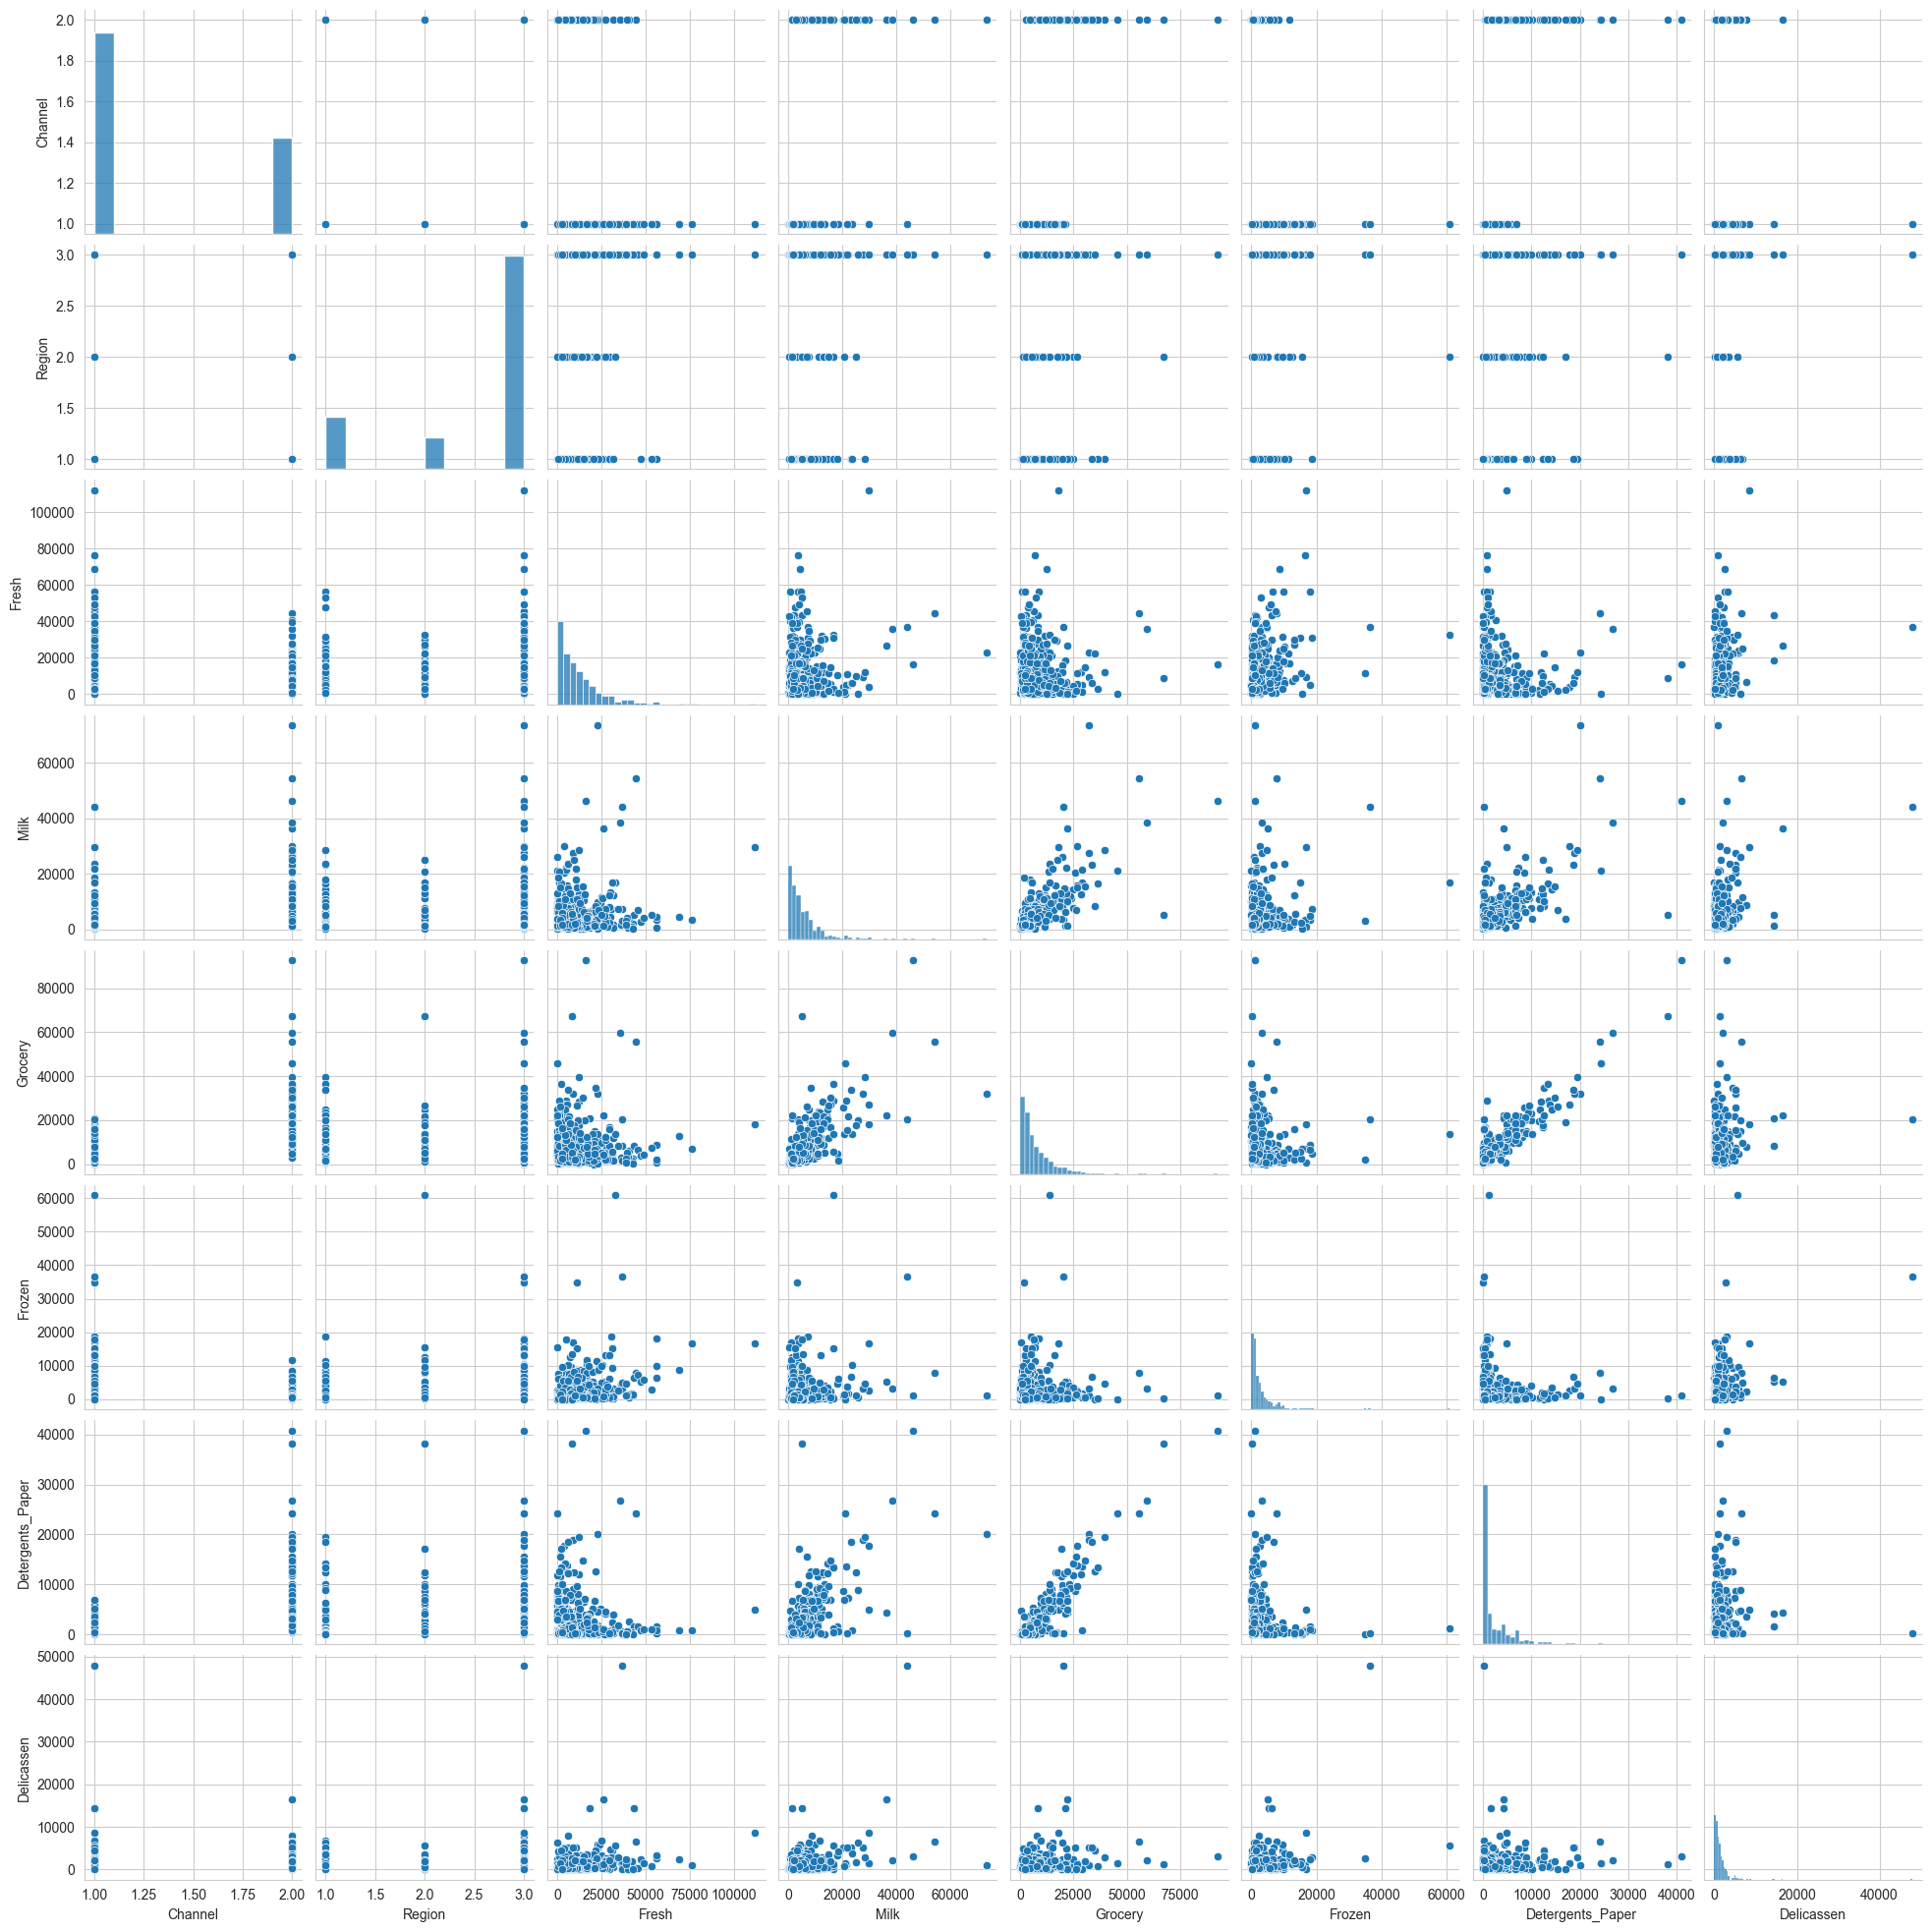

In [45]:
sns.pairplot(data)

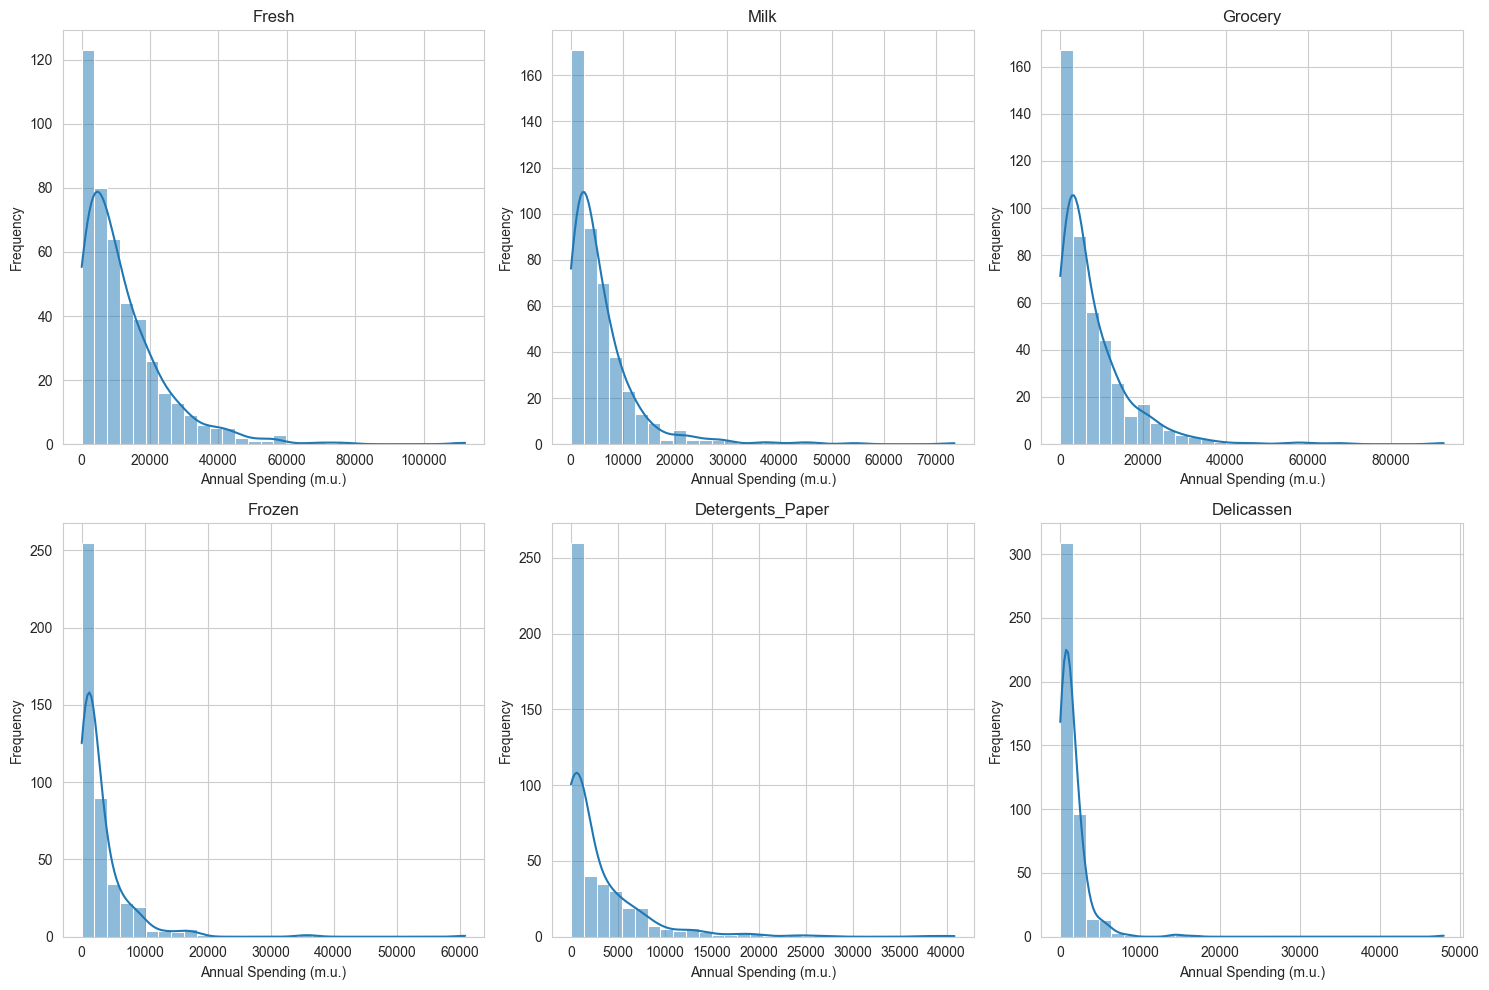

In [46]:
# Distribution of attributes in the data
sns.set_style("whitegrid")

# List of categories to plot
categories = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Plot histograms for each category
plt.figure(figsize=(15, 10))
for i, category in enumerate(categories, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[category], kde=True, bins=30)
    plt.title(category)
    plt.xlabel('Annual Spending (m.u.)')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

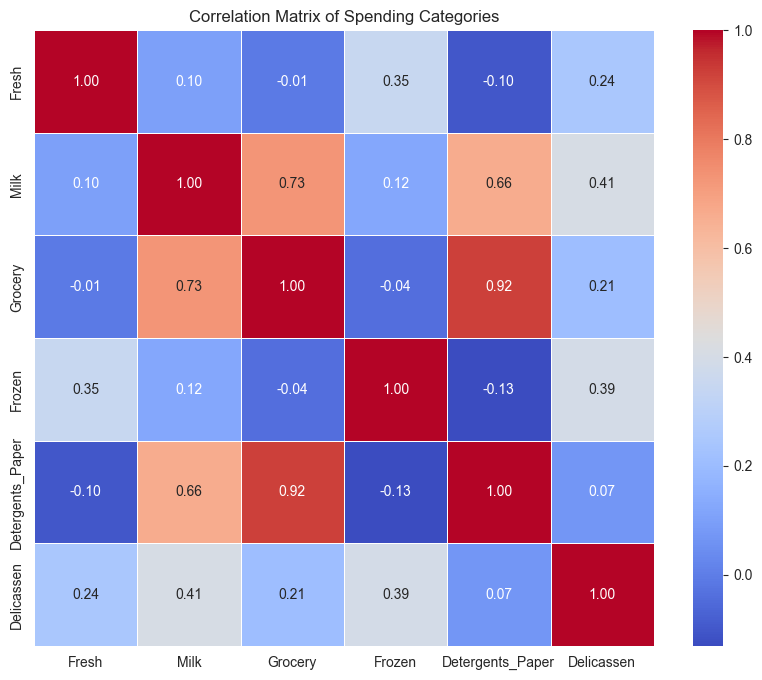

In [47]:
# finding the correlation between attributes in the data
correlation_matrix = data[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Spending Categories')
plt.show()

##### There's a notably high correlation between 'Grocery' and 'Detergents_Paper' (0.92), and a strong correlation between 'Milk' and 'Grocery' (0.73) as well as 'Milk' and 'Detergents_Paper' (0.66). This implies that customers who spend more on groceries also tend to spend more on detergents and paper products, and similarly, those who spend more on milk also spend more on groceries and detergents/paper.

#### eda to gain insights on channel wise and region wise purchasing

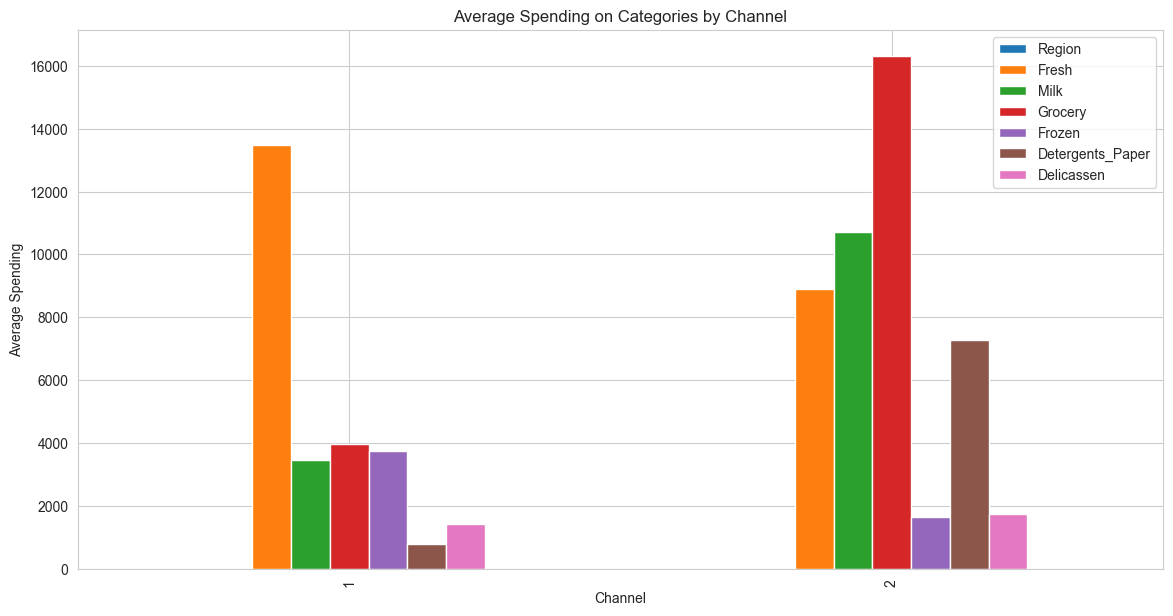

In [48]:
# Aggregate data by 'Channel'
channel_agg = data.groupby('Channel').mean()

# Aggregate data by 'Region'
region_agg = data.groupby('Region').mean()


# Average Spending on Categories by Channel
sns.set_style("whitegrid")

# Plot for 'Channel'
channel_agg.plot(kind='bar', figsize=(14, 7), title='Average Spending on Categories by Channel')
plt.ylabel('Average Spending')
plt.show()

#### the average spending on 'Milk', 'Grocery', 'Detergents_Paper', and 'Delicassen' is substantially higher in retail customers than the hotel customers. This could be one of the big super markets.

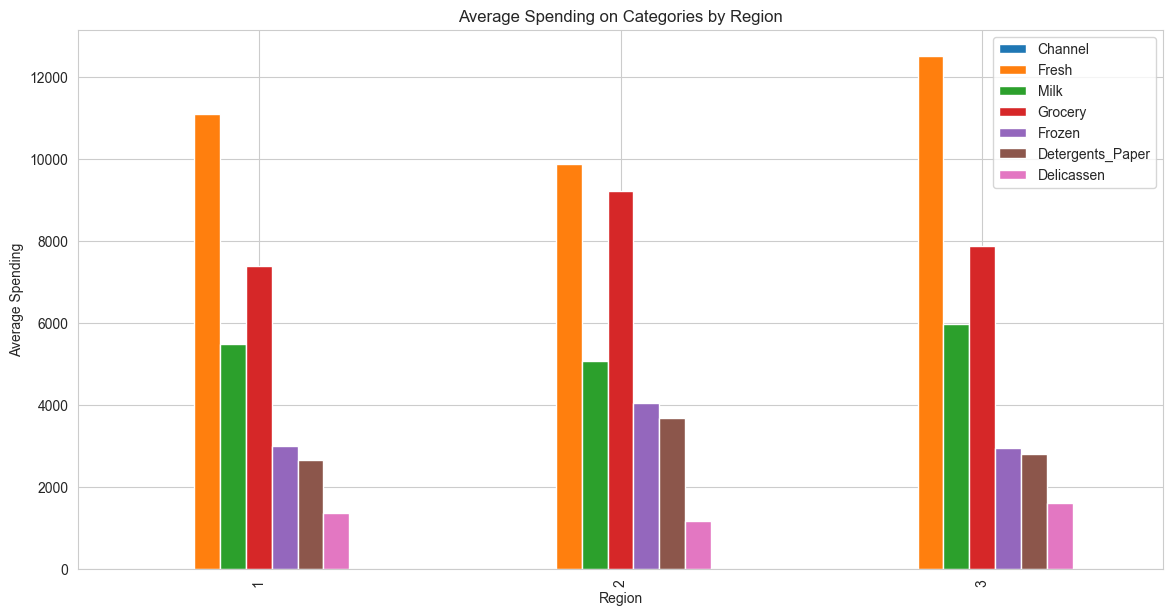

In [49]:
region_agg.plot(kind='bar', figsize=(14, 7), title='Average Spending on Categories by Region')
plt.ylabel('Average Spending')
plt.show()

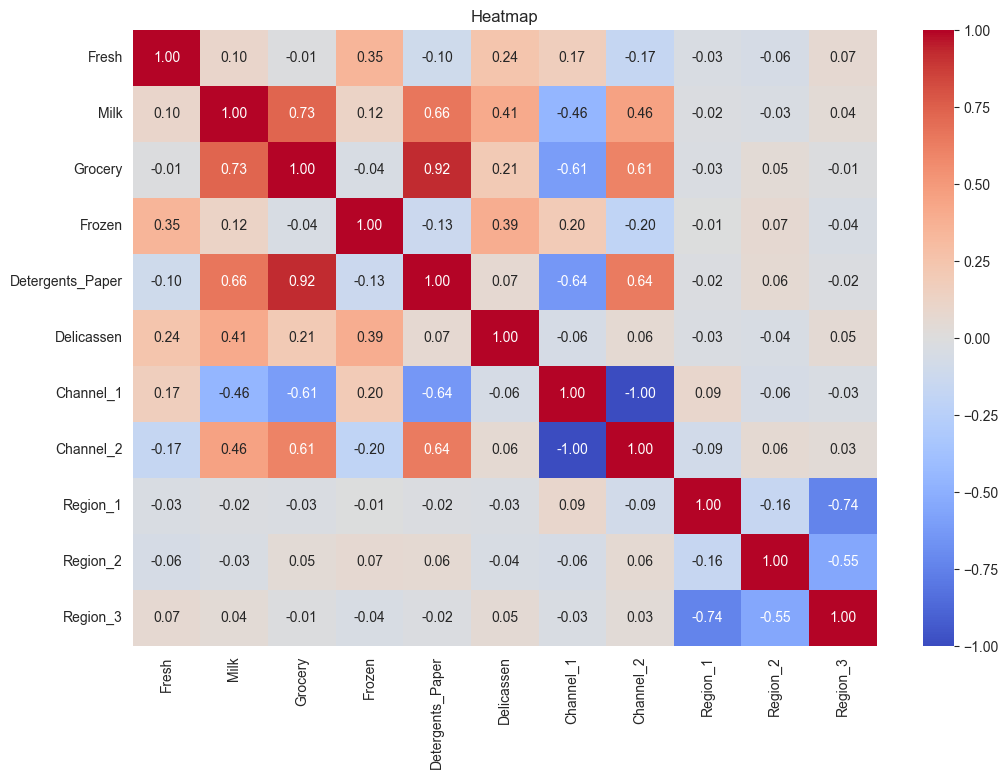

In [50]:
df_encoded = pd.get_dummies(data, columns=['Channel', 'Region'])
# Calculate the correlation matrix including the new one-hot encoded variables
correlation_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap')
plt.show()

#### reducing the dimension of the data to visualize it in a 2d setup by using PCA


In [51]:
from sklearn.decomposition import PCA

# Initialize PCA with 2 components
pca = PCA(n_components=2)

# Fit PCA to the data and transform it
data_pca = pca.fit_transform(final_df_scaled)


#### finding the optimal number of clusters based on BIC and AIC scores

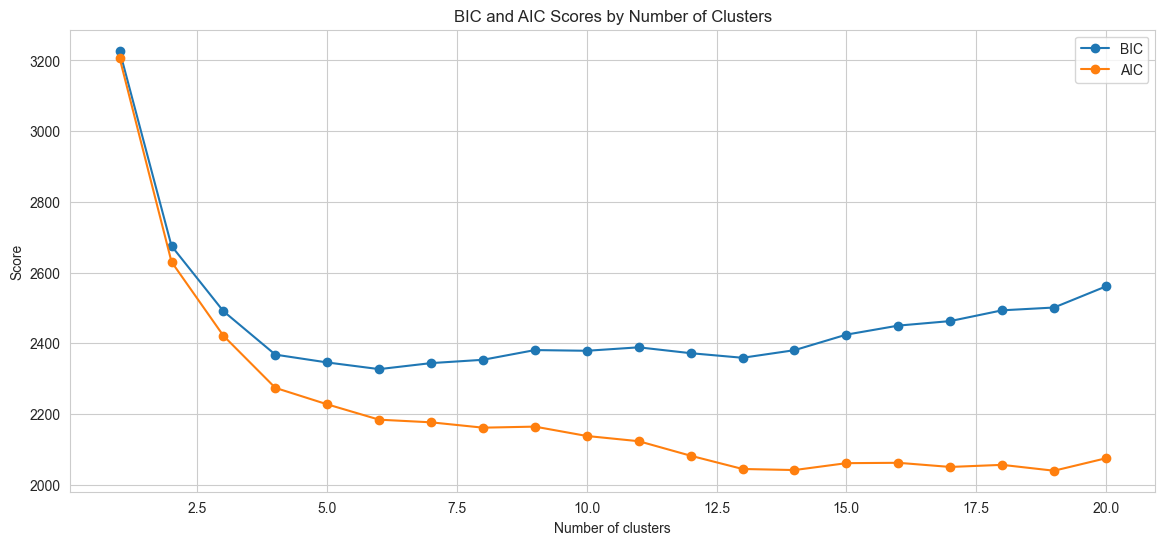

Optimal number of clusters based on BIC: 6
Optimal number of clusters based on AIC: 19


In [52]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt


# range of clusters to try
n_clusters = np.arange(1, 21)
bics = []
aics = []

# Fitting a Gaussian Mixture Model for each number of clusters
for n in n_clusters:
    gmm = GaussianMixture(n_components=n, random_state=0).fit(data_pca)
    bics.append(gmm.bic(data_pca))
    aics.append(gmm.aic(data_pca))

# Plot the BIC scores
plt.figure(figsize=(14, 6))
plt.plot(n_clusters, bics, label='BIC', marker='o')
plt.plot(n_clusters, aics, label='AIC', marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.legend()
plt.title('BIC and AIC Scores by Number of Clusters')
plt.show()

# Identify the optimal number of clusters based on lowest BIC and AIC
optimal_clusters_bic = n_clusters[np.argmin(bics)]
optimal_clusters_aic = n_clusters[np.argmin(aics)]
print(f'Optimal number of clusters based on BIC: {optimal_clusters_bic}')
print(f'Optimal number of clusters based on AIC: {optimal_clusters_aic}')


In [53]:
from sklearn.mixture import GaussianMixture

# Initializing the Gaussian Mixture Model with the number of components
gmm = GaussianMixture(n_components=6, random_state=0)

# Fit the GMM to the data
gmm.fit(data_pca)

# Predict the cluster labels
labels = gmm.predict(data_pca)

#### visualizing the cluster distribution in a 2d setup

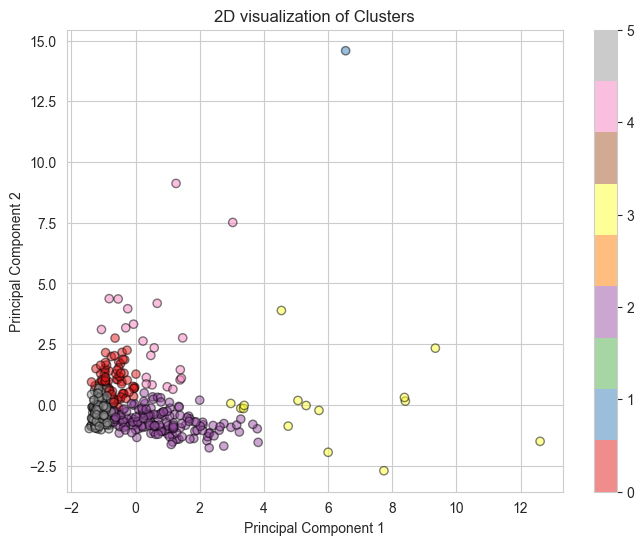

In [54]:
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='Set1', edgecolor='k', alpha=0.5)
plt.title('2D visualization of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

In [57]:
# means of each cluster
centroids = gmm.means_

# Covariances of each cluster
covariances = gmm.covariances_

print(centroids,covariances)

[[-0.67392387  0.83807123]
 [ 6.54729442 14.58231579]
 [ 0.72192374 -0.67304051]
 [ 5.08780214 -0.02070821]
 [ 0.3830431   2.34650841]
 [-1.07773767 -0.19333449]] [[[ 1.26827543e-01 -9.03268328e-03]
  [-9.03268328e-03  5.59040835e-01]]

 [[ 1.00000000e-06  4.54383881e-28]
  [ 4.54383881e-28  1.00000000e-06]]

 [[ 1.18103480e+00 -1.82633902e-01]
  [-1.82633902e-01  2.10789630e-01]]

 [[ 9.73793696e+00 -8.91902451e-01]
  [-8.91902451e-01  2.25813503e+00]]

 [[ 8.78541580e-01  5.30026930e-01]
  [ 5.30026930e-01  5.30442201e+00]]

 [[ 2.77082261e-02  1.27782618e-02]
  [ 1.27782618e-02  1.92051005e-01]]]


In [58]:
# Adding the cluster labels to the original dataframe
df_encoded['Cluster'] = labels

# calculating the descriptive statistics for each cluster
cluster_descriptive_stats = df_encoded.groupby('Cluster').agg(['mean', 'median', 'std', 'min', 'max'])

cluster_descriptive_stats.head()

Fresh                                                Milk                                            Grocery                                             Frozen                                      Detergents_Paper                                        Delicassen                                     Channel_1                                Channel_2                                 Region_1                                 Region_2                                 Region_3                              
                 mean   median           std    min     max          mean   median           std    min    max          mean   median           std    min    max          mean   median           std    min    max             mean   median           std   min    max          mean   median          std    min    max      mean median       std    min    max      mean median       std    min    max      mean median       std    min    max      mean median       std    min    max      mean median       std    min   max
Cluster                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
0        22956.926471  20002.0  13699.453039      3   56083   3854.073529   3611.5   2381.682062    286  13252   4325.794118   4122.5   2289.472745    471  11107   6055.441176   5556.5   4505.141807    127  17866       695.632353    511.5    626.456486    15   2587   1964.882353   1821.5  1361.084988      3   5864  0.926471    1.0  0.262944  False   True  0.073529    0.0  0.262944  False   True  0.132353    0.0  0.341394  False   True  0.102941    0.0  0.306141  False   True  0.764706    1.0  0.427336  False  True
1        36847.000000  36847.0           NaN  36847   36847  43950.000000  43950.0           NaN  43950  43950  20170.000000  20170.0           NaN  20170  20170  36534.000000  36534.0           NaN  36534  36534       239.000000    239.0           NaN   239    239  47943.000000  47943.0          NaN  47943  47943  1.000000    1.0       NaN   True   True  0.000000    0.0       NaN  False  False  0.000000    0.0       NaN  False  False  0.000000    0.0       NaN  False  False  1.000000    1.0       NaN   True  True
2         6648.083333   4608.0   6393.783785      9   29526   7824.762821   7102.5   4130.503034    944  25071  12543.467949  10958.5   6449.879750   2368  36486   1280.660256    946.0   1198.821795     25   6269      5248.153846   4511.5   3505.293275    93  17120   1199.211538   1071.5   972.365596      3   6372  0.243590    0.0  0.430630  False   True  0.756410    1.0  0.430630  False   True  0.160256    0.0  0.368025  False   True  0.128205    0.0  0.335395  False   True  0.711538    1.0  0.454506  False  True
3        14503.666667   9198.0  13318.440994     85   44466  30685.466667  27472.0  17422.260395   4980  73498  40632.266667  33586.0  20390.719960  19816  92780   2619.400000   1740.0   2490.837977     36   7782     19360.666667  18906.0  10556.769004  4337  40827   4454.800000   4430.0  3848.869949    903  16523  0.000000    0.0  0.000000  False  False  1.000000    1.0  0.000000   True   True  0.133333    0.0  0.351866  False   True  0.066667    0.0  0.258199  False   True  0.800000    1.0  0.414039  False  True
4        33465.142857  29703.0  27454.169192    759  112151  11119.190476   9776.0   8087.068434    555  29627   9728.333333   8906.0   5566.998746    902  21042  12555.857143   8692.0  13646.160076    287  60869      1608.714286    830.0   1582.377993    71   4948   5017.809524   3636.0  3732.379491    918  14472  0.809524    1.0  0.402374  False   True  0.190476    0.0  0

By comparing the mean of each cluster for different segments we can devise marketing strategy to improve sales on selling that particular item which has high mean for that particular consumer